In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [7]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test=x_train/255, x_test/255
x_train.shape

(60000, 28, 28)

In [8]:
# making it to a height x width x color dimentsion
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [9]:
K=len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [12]:
# building model using function API
i=Input(shape=x_train[0].shape)
# first arg - number of feature maps
# second arg - filter size
# third - number of pixels to move the filter
x=Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x=Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x=Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)

# creating a model with a single input and single output, it can be a list of inputs and a list of outputs too.
model=Model(i, x)

In [13]:
# compile and fit the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 5ms/step - loss: 0.5162 - accuracy: 0.8089 - val_loss: 0.3785 - val_accuracy: 0.8557
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3590 - accuracy: 0.8652 - val_loss: 0.3535 - val_accuracy: 0.8696
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3072 - accuracy: 0.8846 - val_loss: 0.3238 - val_accuracy: 0.8763
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.8967 - val_loss: 0.3047 - val_accuracy: 0.8901
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2519 - accuracy: 0.9056 - val_loss: 0.3097 - val_accuracy: 0.8900
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2281 - accuracy: 0.9135 - val_loss: 0.3048 - val_accuracy: 0.8941
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2097 - accuracy: 0.9206 - val_loss: 0.3082 - val_accuracy

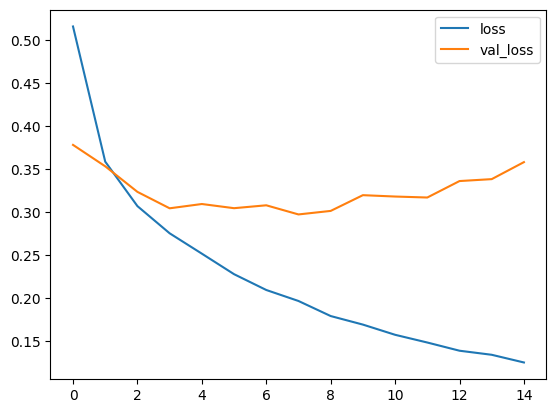

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

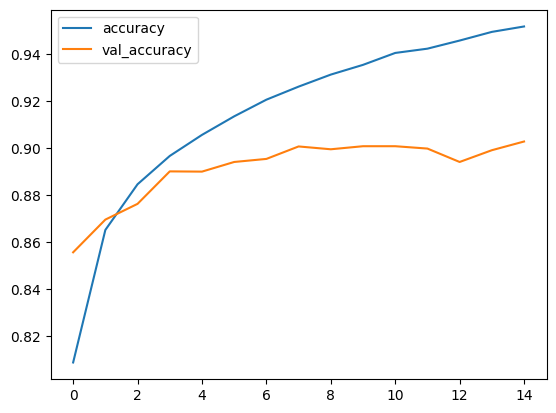

In [15]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [21]:
p_test=model.predict(x_test).argmax(axis=1)
p_test

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

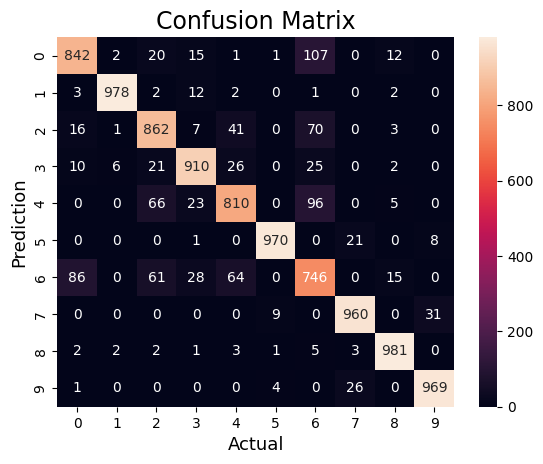

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test, p_test)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Text(0.5, 1.0, 'True Label: 0 Predicted Label: 6')

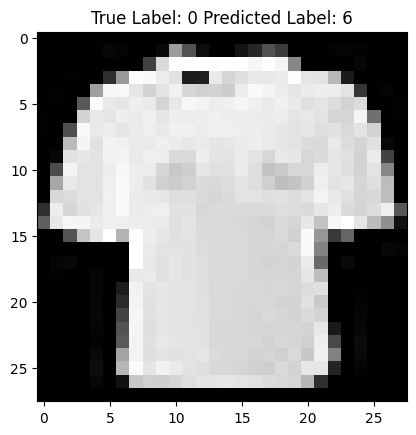

In [27]:
misclass_idx=np.where(y_test!=p_test)[0]
i=np.random.choice(misclass_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label: "+str(y_test[i])+" Predicted Label: "+str(p_test[i]))